# Python for (open) Neuroscience

_Lecture 1.4_ - More on `pandas` and plotting

Luigi Petrucco

Jean-Charles Mariani

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vigji/python-cimec/blob/main/lectures/Lecture1.4_More-panda-plotting.ipynb)

In [55]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### `.groupby()`

We have a handy syntax to average within each category with `.groupby()`.

The sintax is :
```python
df.groupby("name_of_the_category_column").operation()
```

Let's create a dataframe with some data for each of three subjects:

In [57]:
n_subjects, n_trials = 3, 4
trials_df = pd.DataFrame(dict(subject=[f"subj{i}" for i in range(n_subjects) for _ in range(n_trials)],
                              accuracy=np.random.uniform(0, 1, n_trials*n_subjects), rt=np.random.uniform(0, 100, n_trials*n_subjects)))
trials_df.head(6)

,subject,accuracy,rt
0,subj0,0.069598,5.463202
1,subj0,0.195559,7.617445
2,subj0,0.915793,23.477228
3,subj0,0.963193,64.847542
4,subj1,0.803368,59.063956
5,subj1,0.136314,64.770474


In [6]:
# In this case, the operation is `mean()`.
# Note how the result will have the variable we group by as index:
subj_means_df = trials_df.groupby("subject").mean()
subj_means_df

,accuracy,rt
subject,,
subj0,0.476039,50.745263
subj1,0.768287,47.652717
subj2,0.409986,63.127683


By the way, this is a reason why methods are better than functions in this case: they can be chained with a clearer syntax!

## Index broadcasting in `pandas`

Let's subtract from each subject the mean for each variable.

In [58]:
trials_df.head(5)

,subject,accuracy,rt
0,subj0,0.069598,5.463202
1,subj0,0.195559,7.617445
2,subj0,0.915793,23.477228
3,subj0,0.963193,64.847542
4,subj1,0.803368,59.063956


In [8]:
subj_means_df.head(3)

,accuracy,rt
subject,,
subj0,0.476039,50.745263
subj1,0.768287,47.652717
subj2,0.409986,63.127683


The indexes obviously don't match!

In [49]:
# this will try to match indexes of one dataframe with the other. As there won't be matches, 
# the result will be lots of nans!
trials_df - subj_means_df

,accuracy,rt,subject,trial_type
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


But pandas will broadcast values using indices if we make them consistent!

In [51]:
trials_df.set_index("subject")
 #trials_df.head()

,trial_type,accuracy,rt
subject,,,
subj0,type0,0.802787,46.736237
subj0,type0,0.270150,69.533324
subj0,type1,0.502427,42.999013
subj0,type1,0.478743,86.961449
subj1,type0,0.203827,52.407474
subj1,type0,0.801548,12.791994
subj1,type1,0.995800,63.288614
subj1,type1,0.418087,11.669838
subj2,type0,0.019232,10.285711


So now we can write:

In [59]:
normalized = trials_df.set_index("subject") - subj_means_df
normalized.head()

,accuracy,rt
subject,,
subj0,-0.406441,-45.282061
subj0,-0.280480,-43.127818
subj0,0.439754,-27.268035
subj0,0.487154,14.102279
subj1,0.035080,11.411239


From each entry in the trials dataframe, numpy will broadcast the correct value of the mean for that subject!

## Multi-indexing

Sometimes, we might want to average keeping the segregation over multiple categories:

In [61]:
# Create again a trials_df:
trials_df = pd.DataFrame(dict(subject=[f"subj{i}" for i in range(n_subjects) for _ in range(n_trials)],
                              trial_type=[f"type{n//2}" for i in range(n_subjects) for n in range(n_trials)],
                              accuracy=np.random.uniform(0, 1, n_trials*n_subjects),
                              rt=np.random.uniform(0, 100, n_trials*n_subjects)))

trials_df.head()

,subject,trial_type,accuracy,rt
0,subj0,type0,0.926437,22.426808
1,subj0,type0,0.342887,30.346110
2,subj0,type1,0.572582,86.570512
3,subj0,type1,0.637211,6.728407
4,subj1,type0,0.757419,4.163872


In [62]:
trial_subj_avg = trials_df.groupby(["subject", "trial_type"]).mean()
trial_subj_avg

accuracy         rt
subject trial_type                     
subj0   type0       0.634662  26.386459
        type1       0.604897  46.649460
subj1   type0       0.532339  22.757244
        type1       0.636751  65.897157
subj2   type0       0.700396  43.425382
        type1       0.652593  72.750561

In [64]:
trials_df.set_index(["subject", "trial_type"]) - trial_subj_avg

accuracy         rt
subject trial_type                     
subj0   type0       0.291775  -3.959651
        type0      -0.291775   3.959651
        type1      -0.032315  39.921053
        type1       0.032315 -39.921053
subj1   type0       0.225081 -18.593371
        type0      -0.225081  18.593371
        type1       0.170966  26.402576
        type1      -0.170966 -26.402576
subj2   type0      -0.099937  -1.685576
        type0       0.099937   1.685576
        type1      -0.321424  25.010144
        type1       0.321424 -25.010144

(Practicals 1.4.0)

## Rolling functions with `.rolling()`

Imagine we have a time series of data, and we want to compute the mean in a sliding window (e.g., for smoothing).

<Axes: >

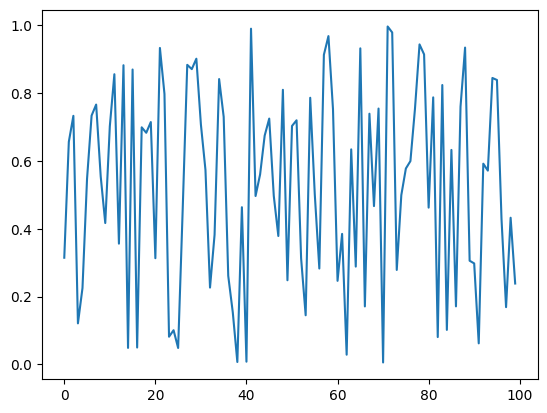

In [19]:
# Let's create a time series:
time_series = pd.Series(np.random.rand(100))
time_series.plot()

In [67]:
# This will compute the mean in a rolling window - ie, smooth it!
rolling_wnd_size = 10
smoothed = time_series.rolling(rolling_wnd_size).mean()

<Axes: >

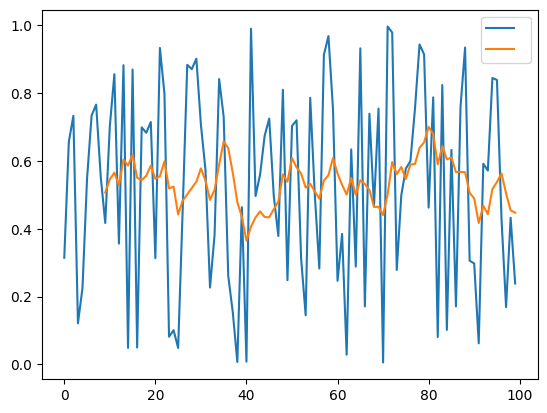

In [68]:
time_series.plot(legend="Original")
smoothed.plot(legend="Time averaged")

Note that there will be nan values at the borders, where we do not have enough data to compute the mean

By default, the window will not be centered:

In [69]:
dirac_series = pd.Series(np.zeros(30))
dirac_series[15] = 1

<Axes: >

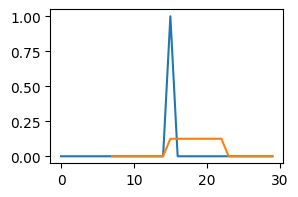

In [70]:
dirac_series.plot(figsize=(3,2))
dirac_series.rolling(8).mean().plot()

We can center the window with the `center=True` argument:

<Axes: >

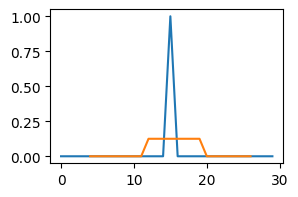

In [24]:
dirac_series.plot(figsize=(3,2))
dirac_series.rolling(8, center=True).mean().plot()

### Usage of `.rolling()`

When done with averaging, same results as other smoothing tools

But now we can use arbitrary functions! (standard deviation, significance tests, etc)

For example, we can look at the range of an oscillation with rolling `max()` and `min()`:

<Axes: >

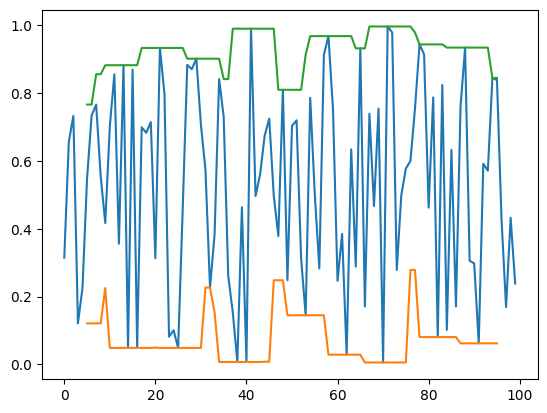

In [25]:
win_size = 10
time_series.plot()
time_series.rolling(window=win_size, center=True).min().plot()
time_series.rolling(window=win_size, center=True).max().plot()

(Practicals 1.4.1)

## Object-oriented plotting using `matplotlib`

Recap: the standard plotting library in Python is `matplotlib`.

In [26]:
import matplotlib.pyplot as plt

To open a new figure, we call `plt.figure()` (if we don't, matplotlib will plot on the last figure we opened).

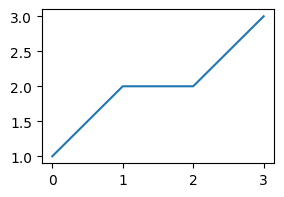

In [71]:
plt.figure(figsize=(3,2))  # with the figsize argument we can control the dimension of the plot
plt.plot([1, 2, 2, 3])  # plot a line


In a simple plot we can control attributes of the plot with some functions such as `plt.xlabel()` or `plt.xlim()`:

(0.0, 500.0)

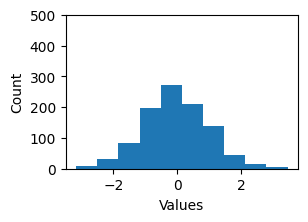

In [33]:
plt.figure(figsize=(3,2))
plt.hist(np.random.randn(1000))
plt.xlabel("Values")
plt.ylabel("Count")
plt.ylim(0, 500)

## Object oriented interface

`matplotlib` has two interfaces: a simple one, and an object oriented one.

To make more complex plots, we should use the object oriented interface: it's more flexible and expressive.

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

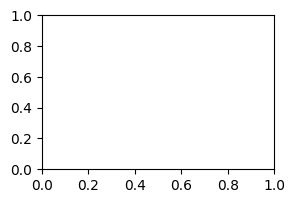

In [34]:
fig, ax = plt.subplots(figsize=(3,2)) # this will create a figure and an axis object

In [72]:
type(fig), type(ax)

(matplotlib.figure.Figure, matplotlib.axes._axes.Axes)

[Text(0.5, 0, 'Time'), Text(0, 0.5, 'Money'), Text(0.5, 1.0, 'My plot')]

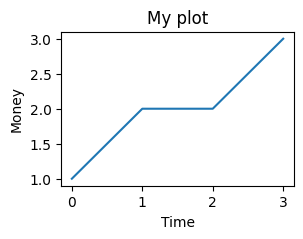

In [74]:
fig, ax = plt.subplots(figsize=(3,2)) # this will create a figure and an axis object
# We can now call methods of the axis object:
ax.plot([1, 2, 2, 3])

# We can modify the aspect of the axis using its methods:
ax.set(xlabel="Time", ylabel="Money", title="My plot")

My recommandation is to get used to the object oriented interface!

Also, I would generally stick to the `matplotlib` functions to generate panels and not mix code with the pandas plotting functions.

## Matplotlib subplots

Using `plt.subplots()` we can create a figure with multiple panels:

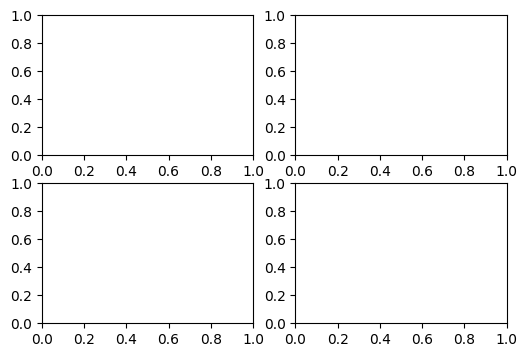

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))

Those axes will be a 2x2 array `numpy` array of axis objects!

In [76]:
type(axes)

numpy.ndarray

In [77]:
axes.shape

(2, 2)

In [78]:
type(axes[0, 0])

matplotlib.axes._axes.Axes

We can plot on each of the axes indexing them the numpy way:

In [43]:
axes[0, 0]  # access one subplot from the grid. From here we can plot using plotting methods

<Axes: >

So we first index the correct axis, and then we use its plotting method:

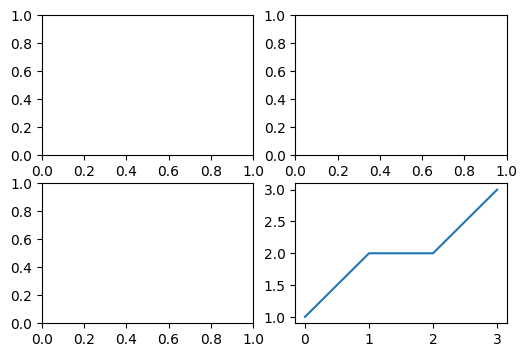

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))

axes[1, 1].plot([1, 2, 2, 3])

It is easy to iterate over multiple axes:

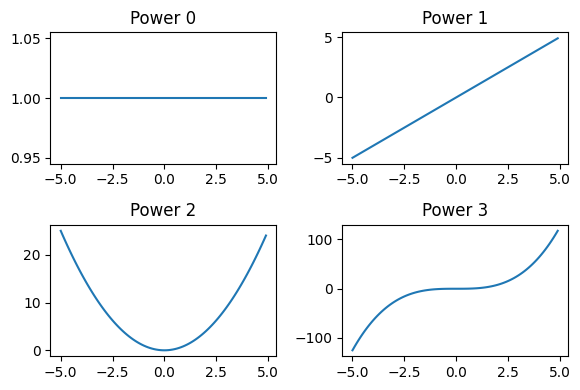

In [85]:
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
x = np.arange(-5, 5, 0.1)

# Double loop over rows and columns
for col_idx  in range(2):
    for row_idx in range(2):
        current_axis = axes[row_idx, col_idx]  # current_axis = axes.flat[i]  # Select one axis
        i = col_idx + row_idx*2
        current_axis.plot(x, x**i)  # Plot on it
        current_axis.set(title=f"Power {i}")  # Set title
        
## cleaner alternative to go through all plots in a single loop:
for i in range(4):
    current_axis = axes.flat[i]
    ...
    

plt.tight_layout()  # separate plots better

Practicals 1.4.2